## Install Required Library 

In [60]:
pip install numpy 

In [61]:
pip install matplotlib

In [62]:
pip install python-binance

In [64]:
pip install pandas

In [63]:
pip install numpy

Data

In [42]:
def live_data():
        pairs = "ltcusdt"#self.pairs
        t_frame = "1min" #self.time_frame
        import pandas as pd
        import numpy as np
        from binance.client import Client 

        client =  Client()
        candles = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")
        loop_f, loop_t = 0, len(candles)
        from datetime import datetime

        time = [
            datetime.fromtimestamp(int(candles[i][0] /1000))  # mili secons 1000
            for i in range(loop_t)
        ]
        open_ = np.array([float(candles[i][1]) for i in range(loop_f, loop_t)])
        high_ = np.array([float(candles[i][2]) for i in range(loop_f, loop_t)])
        low_ = np.array([float(candles[i][3]) for i in range(loop_f, loop_t)])
        close_ = np.array(
            [float(candles[i][4]) for i in range(loop_f, loop_t)])
        val_ = np.array([float(candles[i][5]) for i in range(loop_f, loop_t)])

        candles = pd.DataFrame({
            "Open": open_,
            "High": high_,
            "Low": low_,
            "Close": close_,
            "volume": val_,
            "time":time
        })
        time = pd.to_datetime(time)
        candles = candles.set_index(time)

        return candles
    

data = live_data()
data

,Open,High,Low,Close,volume,time
2022-08-14 06:35:00,0.013381,0.013381,0.013379,0.013379,5.957,2022-08-14 06:35:00
2022-08-14 06:36:00,0.013380,0.013383,0.013379,0.013381,19.345,2022-08-14 06:36:00
2022-08-14 06:37:00,0.013381,0.013382,0.013381,0.013381,3.367,2022-08-14 06:37:00
2022-08-14 06:38:00,0.013381,0.013381,0.013369,0.013370,62.660,2022-08-14 06:38:00
2022-08-14 06:39:00,0.013370,0.013372,0.013369,0.013369,17.401,2022-08-14 06:39:00
...,...,...,...,...,...,...
2022-08-15 06:30:00,0.013038,0.013047,0.013038,0.013040,69.170,2022-08-15 06:30:00
2022-08-15 06:31:00,0.013039,0.013047,0.013039,0.013046,41.784,2022-08-15 06:31:00
2022-08-15 06:32:00,0.013047,0.013049,0.013035,0.013035,82.956,2022-08-15 06:32:00
2022-08-15 06:33:00,0.013035,0.013039,0.013034,0.013037,19.377,2022-08-15 06:33:00


Calculation Nadaraya-Watson

In [43]:
data = data['Close'].values

import math
h      = 8
mult   = 3
src    = data
k = 2
y = []
#..............#
up = []
dn = []
up_signal = []
dn_signal = []
up_temp = 0
dn_temp = 0
#.................#
upper_band = []
lower_band = []
upper_band_signal = []
lower_band_signal = []
#....................#
sum_e = 0
for i in range(len(data)):
    sum = 0
    sumw = 0   
    for j in range(len(data)):
        w = math.exp(-(math.pow(i-j,2)/(h*h*2)))
        sum += src[j]*w
        sumw += w
    y2 = sum/sumw
    sum_e += abs(src[i] - y2)
    y.insert(i,y2)
mae = sum_e/len(data)*mult
#print(mae)
import numpy as np
for i  in range(len(data)):
        y2 = y[i]
        y1 = y[i-1]
        
        if y[i]>y[i-1]:
            up.insert(i,y[i])
            if up_temp == 0:
                up_signal.insert(i,data[i])
            else:
                up_signal.insert(i,np.nan)
            up_temp = 1
        else:
            up_temp = 0
            up.insert(i,np.nan)
            up_signal.insert(i,np.nan)
            
        if y[i]<y[i-1]:
            dn.insert(i,y[i])
            if dn_temp == 0:
                dn_signal.insert(i,data[i])
            else:
                dn_signal.insert(i,np.nan)
            dn_temp = 1
        else:
            dn_temp = 0
            dn.insert(i,np.nan)
            dn_signal.insert(i,np.nan)
            
            
        upper_band.insert(i,y[i]+mae)
        lower_band.insert(i,y[i]-mae)
        if data[i]> upper_band[i]:
            upper_band_signal.insert(i,data[i])
        else:
            upper_band_signal.insert(i,np.nan)
            
        if data[i]<lower_band[i]:
            lower_band_signal.insert(i,data[i])
        else:
            lower_band_signal.insert(i,np.nan)
        
        

Converting to pandas

In [44]:
import pandas as pd
Nadaraya_Watson = pd.DataFrame({
            "Buy": up,
            "Sell": dn,
            "BUY_Signal": up_signal,
            "Sell_Signal": dn_signal,
            "Uppar_Band": upper_band,
            "Lower_Band":lower_band,
            "Upper_Band_signal":upper_band_signal,
            "Lower_Band_Signal":lower_band_signal
        })
Nadaraya_Watson

,Buy,Sell,BUY_Signal,Sell_Signal,Uppar_Band,Lower_Band,Upper_Band_signal,Lower_Band_Signal
0,0.013368,NaN,0.013379,NaN,0.013388,0.013348,NaN,NaN
1,NaN,0.013367,NaN,0.013381,0.013387,0.013347,NaN,NaN
2,NaN,0.013366,NaN,NaN,0.013386,0.013347,NaN,NaN
3,NaN,0.013366,NaN,NaN,0.013386,0.013346,NaN,NaN
4,NaN,0.013365,NaN,NaN,0.013385,0.013345,NaN,NaN
...,...,...,...,...,...,...,...,...
1435,0.013022,NaN,NaN,NaN,0.013042,0.013002,NaN,NaN
1436,0.013023,NaN,NaN,NaN,0.013043,0.013003,0.013046,NaN
1437,0.013024,NaN,NaN,NaN,0.013044,0.013004,NaN,NaN
1438,0.013025,NaN,NaN,NaN,0.013045,0.013005,NaN,NaN


Visualising 

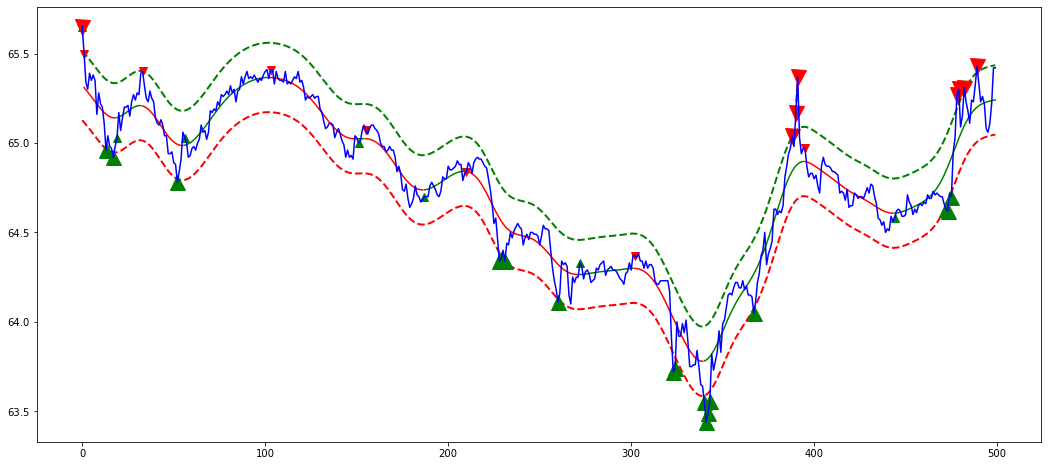

In [ ]:
%matplotlib inline    
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(np.array(upper_band), color= 'green', linestyle='--', linewidth=2) 
plt.plot(np.array(lower_band), color= 'red', linestyle='--', linewidth=2) 

plt.plot(np.array(up_signal), color= 'green', marker='^', linestyle='dashed', linewidth=2, markersize=8) 
plt.plot(np.array(dn_signal), color= 'red', marker='v', linestyle='dashed', linewidth=2, markersize=8) 
#plt.plot(np.array(upper_band), color= 'green', label= 'Polynomial model',marker='o', linestyle='dashed', linewidth=2, markersize=12) 


plt.plot(np.array(dn), color= 'red', label= 'Polynomial model') 
plt.plot(np.array(up), color= 'green', label= 'Polynomial model')
plt.plot(np.array(upper_band_signal), color= 'red', marker='v', linestyle='dashed', linewidth=2, markersize=15) 
plt.plot(np.array(lower_band_signal), color= 'green', marker='^', linestyle='dashed', linewidth=2, markersize=15) 


plt.plot(np.array(data[:]), color= 'blue', label= 'Data')
plt.show()